In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [2]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/sample_submission.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/train.csv')

In [3]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
# Handle missing values by filling them with the mean of the respective columns
df_train.fillna(df_train.mean(), inplace=True)

C:\Users\kobem\AppData\Local\Temp\ipykernel_3520\3453226001.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.fillna(df_train.mean(), inplace=True)


**After filling the empty cols with the mean of each respective col, we chose to delete the newly created cols 'CryoSleep_0.35830580462482303' 'VIP_0.023439340400471142' since these cols are no longer needed**

In [6]:
# creates dummy colums using get_dummies func and selecting the cols Thal and ChestPain from dataframe
df_train_encoded = pd.get_dummies(df_train, columns = ['HomePlanet', 'CryoSleep' ,'VIP'] )

df_train_encoded.head()# prints newly encoded data with the categorical cols 

,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_0.35830580462482303,CryoSleep_True,VIP_False,VIP_0.023439340400471142,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,0,1,0,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,0,1,0,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,0,1,0,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,0,1,0,0


In [7]:
# List of columns to be deleted
columns_to_delete = ['CryoSleep_0.35830580462482303', 'VIP_0.023439340400471142']

# Use the drop method to remove the specified columns
df_train_encoded = df_train_encoded.drop(columns=columns_to_delete)
df_train_encoded.head()# prints newly encoded data with the categorical cols 


,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,1,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,1,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,1,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,1,0


In [8]:
feature_cols = ['Age', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','VIP_False','VIP_True']
X = df_train_encoded[feature_cols]
y = df_train['Transported']

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9) # splits 

# KNN Classifier


****

In [10]:
# Assuming you have already loaded and preprocessed your data (X_train, X_test, y_train, y_test)

# Define a list of k values
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Calculate accuracy on the testing data
    knn_accuracy = knn_classifier.score(X_test, y_test)

    # Print accuracy for the current k value
    print(f"Accuracy on Testing Data of KNN Classifier with k={k}: {round(knn_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if knn_accuracy > highest_accuracy:
        highest_accuracy = knn_accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Accuracy on Testing Data of KNN Classifier with k=3: 0.67
Accuracy on Testing Data of KNN Classifier with k=5: 0.69
Accuracy on Testing Data of KNN Classifier with k=7: 0.7
Accuracy on Testing Data of KNN Classifier with k=9: 0.71
Accuracy on Testing Data of KNN Classifier with k=11: 0.72
Accuracy on Testing Data of KNN Classifier with k=13: 0.72
Accuracy on Testing Data of KNN Classifier with k=15: 0.72
Accuracy on Testing Data of KNN Classifier with k=17: 0.72
Accuracy on Testing Data of KNN Classifier with k=19: 0.72
Accuracy on Testing Data of KNN Classifier with k=21: 0.72

Highest Accuracy: 0.72 (k=21)


# Decision Tree Classifier

****

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=5)#uses DTC func with random state
dt_classifier.fit(X_train, y_train)#use fit func for comparing x and y training labels 
dt_accuracy = dt_classifier.score(X_test, y_test)# uses score func to pridict score with testing data x and y 
print("Accuracy on Testing Data of Decision Tree Classifier (with encoded features):", round(dt_accuracy,2))# prints accuracy scoreand rounds u

Accuracy on Testing Data of Decision Tree Classifier (with encoded features): 0.72


In [12]:
lr_classifier = LogisticRegression(max_iter=400) # calls LogisiticRegression fun with max iteration 
lr_classifier.fit(X_train, y_train)#use fit func for comparing x and y training labels 
lr_accuracy = lr_classifier.score(X_test, y_test)#uses score func to pridict score with testing data x and y 
print("Accuracy on Testing Data of Logistic Regression Classifier (with encoded features):", round(lr_accuracy, 2))#prints accuracy score and rounds up 

Accuracy on Testing Data of Logistic Regression Classifier (with encoded features): 0.7


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

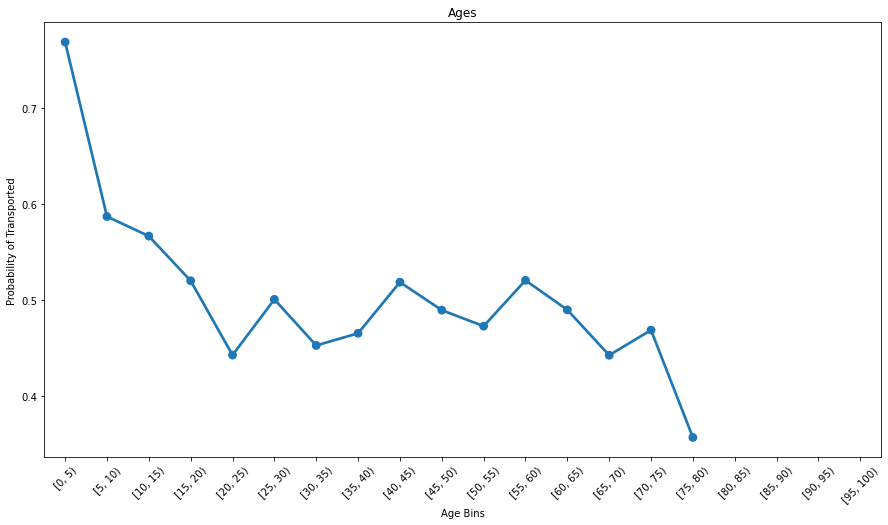

In [27]:
plt.figure(figsize=(15, 8))

# Create age bins
df_train_encoded['Age_Bins'] = pd.cut(df_train['Age'], bins=range(0, 101, 5), right=False)

# Using pointplot to show the probability of Transported being 1 at different age bins
sns.pointplot(data=df_train_encoded, x='Age_Bins', y='Transported', ci=None)

plt.xlabel('Age Bins')
plt.ylabel('Probability of Transported')
plt.title('Ages')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

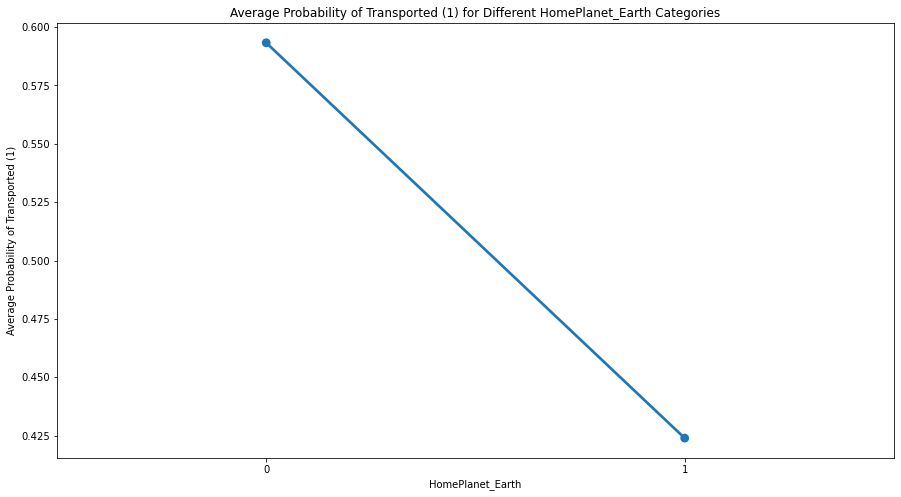

In [28]:
plt.figure(figsize=(15, 8))

# Assuming df_train is your DataFrame

# Calculate the average probability of Transported being 1 for each category of HomePlanet_Earth
average_probs = df_train_encoded.groupby('HomePlanet_Earth')['Transported'].mean().reset_index()

# Using pointplot to show the average probability of Transported being 1 for each category of HomePlanet_Earth
sns.pointplot(data=average_probs, x='HomePlanet_Earth', y='Transported', ci=None)

plt.xlabel('HomePlanet_Earth')
plt.ylabel('Average Probability of Transported (1)')
plt.title('Average Probability of Transported (1) for Different HomePlanet_Earth Categories')

plt.show()